#**Predicting COVID-19: Leveraging Machine Learning for Early Detection**

## Introduction:
The ongoing COVID-19 pandemic has underscored the need for effective disease prediction models. Our project aims to harness the power of machine learning to predict COVID-19 cases, thereby enabling early detection, efficient resource allocation, and improved medical treatment.

Our project embarks on a two-fold journey: first, we meticulously apply all steps on the training dataset, ensuring robustness and accuracy. Subsequently, we seamlessly transition to the test dataset, showcasing the consistency and reliability of our predictive model across different scenarios.

We are working with a comprehensive dataset that includes individual health information. This dataset comprises parameters such as cough symptoms, fever, sore throat, shortness of breath, headache, and potential exposure to known COVID-19 contacts. The dataset also includes demographic information like age, gender, and travel history.

### Section 1: Questions to Answer:
**1. Why is your proposal important in today’s world? How predicting a disease accurately can improve medical treatment?**

- The implementation of advanced technologies, particularly machine learning, in disease prediction has the potential to revolutionize our response to the pandemic in several impactful ways:
 1. A precise COVID-19 prediction model can swiftly identify individuals who are at risk of contracting the virus. This early detection allows for timely isolation and testing, effectively curbing the spread of the virus within communities.
 2. Accurate prediction models help healthcare institutions anticipate the number of COVID-19 cases that may require medical attention.
 3. Data-driven COVID-19 prediction models provide insights into the patterns of virus transmission and outbreak dynamics. Public health authorities can make informed decisions about lockdowns, travel restrictions, and other containment measures based on these insights.
 4. As vaccines become available, prediction models can aid in prioritizing vaccine distribution. High-risk populations and areas with an anticipated surge in cases can be targeted, ensuring that the limited vaccine supply is used most effectively.


**2. How is it going to impact the medical field when it comes to effective screening and reducing health care burden.**

- By identifying potential cases early and offering timely medical interventions, the prediction model can help in reducing the overall burden on healthcare systems. This is particularly crucial during a pandemic when healthcare facilities are strained. By preventing severe cases and hospitalizations, the model contributes to reducing the load on hospitals and medical staff.

**3. If any, what is the gap in the knowledge or how your proposed method can be helpful if required in future for any other disease.**

- The proposed disease prediction method, originally developed for COVID-19, holds the potential to address future medical challenges. Its adaptability allows it to be quickly tailored for emerging diseases, serving as an early warning system, optimizing resource allocation, and aiding in personalized medicine. This method's versatility positions it as a versatile tool for disease surveillance, policy-making, and research, making a substantial impact on global health preparedness and effective medical treatment.

In [1]:
# import libraries
import numpy as np
import pandas as pd
import missingno as msno
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [2]:
# To load the data (.csv file)
dataC = pd.read_csv("corona_tested_006.csv")

dataF = dataC.copy()
dataF

<ipython-input-2-efed575f7e65>:2: DtypeWarning: Columns (2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  dataC = pd.read_csv("corona_tested_006.csv")


,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...,...
278843,278844,30-04-2020,False,False,False,False,False,positive,None,male,Other
278844,278845,30-04-2020,False,False,False,False,False,negative,None,female,Other
278845,278846,30-04-2020,False,False,False,False,False,negative,None,male,Other
278846,278847,30-04-2020,False,False,False,False,False,negative,None,male,Other


We can see here in first 5 rows data is present in capital letters and in last 5 rows there is only first letter in capital and all are in small, it can create problem in encoding so we have replace all 'False' into 'FALSE'.

### Section 2 : Initial Hypothesis:

**Hypothesis for Data Analysis (DA Track):**
Our initial hypothesis in the Data Analysis track is that certain symptoms and demographic factors are more strongly associated with COVID-19 infection. We aim to identify these patterns through exploratory data analysis and feature selection techniques. Specifically, we believe that certain symptoms such as cough, fever, sore throat, and shortness of breath will exhibit a higher correlation with COVID-19 positivity. Additionally, we hypothesize that demographic variables like age, sex, and travel history might play a significant role in determining the risk of infection.

**Hypothesis for Machine Learning (ML Track):**
In the Machine Learning track, our primary hypothesis is that machine learning models can effectively predict COVID-19 cases based on the selected features. We believe that our curated dataset, enriched with relevant information, will empower the models to learn the underlying patterns and make accurate predictions.

- We anticipate that Support Vector Machines (SVM), Decision Tree, Naive Bayes, and Logistic Regression models will all exhibit a reasonable degree of accuracy. However, we hypothesize that the Decision Tree and SVM models might outperform others due to their ability to capture complex relationships and achieve high precision.

- Justification and Model Selection:
To validate our hypotheses, we will perform rigorous model evaluations, leveraging metrics such as accuracy, precision, recall, F1-score. By comparing the performance of different models, we can identify which one excels in terms of overall accuracy and the specific needs of early COVID-19 detection.


### Section 3: Data analysis approach:

**Approach to Prove Hypothesis:**
To validate our hypotheses, we will follow a systematic approach that involves both exploratory data analysis (EDA) and machine learning techniques. Our goal is to identify crucial patterns, relationships, and features that significantly impact the prediction of COVID-19 cases.

**Justification of Approach:**
Our approach is rooted in the desire to identify meaningful patterns and relationships within the dataset that contribute to COVID-19 prediction. By focusing on feature selection and engineering, we aim to provide the machine learning models with the most relevant and informative inputs, leading to more accurate predictions.



In [ ]:
dataF.shape   # To see no.of rows and columns of our dataset

(278848, 11)

There are total 278848 observations and 11 variables in the data set.

In [ ]:
dataF.head()  # To see first 5 rows.

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed


From the **head** command it is clear that there are missing values in the dataset, as there are None in Two columns i.e Age_60_above column and Sex Column.

In [ ]:
dataF.tail()   # To see last 5 rows

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
278843,278844,30-04-2020,False,False,False,False,False,positive,None,male,Other
278844,278845,30-04-2020,False,False,False,False,False,negative,None,female,Other
278845,278846,30-04-2020,False,False,False,False,False,negative,None,male,Other
278846,278847,30-04-2020,False,False,False,False,False,negative,None,male,Other
278847,278848,30-04-2020,False,False,False,False,False,negative,None,female,Other


We have missing value in the last 5 rows.

In [ ]:
dataF.info()    # To get a concise summary of the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278848 non-null  object
 3   Fever                278848 non-null  object
 4   Sore_throat          278848 non-null  object
 5   Shortness_of_breath  278848 non-null  object
 6   Headache             278848 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         278848 non-null  object
 9   Sex                  278848 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


We can see from above function that there is only 1 numercial variable and 10 categorical variables.

In [ ]:
dataF.columns   # To return the column labels of the Dataset.

Index(['Ind_ID', 'Test_date', 'Cough_symptoms', 'Fever', 'Sore_throat',
       'Shortness_of_breath', 'Headache', 'Corona', 'Age_60_above', 'Sex',
       'Known_contact'],
      dtype='object')

#### Checking unique values
- We want to be sure that there is no unnecesrry value present in our dataset

In [ ]:
# checking for the unique values in our data

dataF.nunique()

Ind_ID                 278848
Test_date                  51
Cough_symptoms              5
Fever                       5
Sore_throat                 5
Shortness_of_breath         5
Headache                    5
Corona                      3
Age_60_above                3
Sex                         3
Known_contact               3
dtype: int64

We can see above there are 278848 observation and the number of unique ID present in the dataset are also equals to the observation that means there is no duplicate ID presented in the dataset.

In [ ]:
# Checking for the null values.

dataF.isnull().sum()

Ind_ID                 0
Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Age_60_above           0
Sex                    0
Known_contact          0
dtype: int64

According to above step there is no missing value is present in the dataset but we have already observed from head() and tail() function that there are missig values entered as 'None'. So we have replace these values as Null/NaN.

- Checking for the unique values in variables


In [ ]:
dataF['Sex'].unique()

array(['None', 'male', 'female'], dtype=object)

In [ ]:
dataF['Cough_symptoms'].unique()

array(['TRUE', 'FALSE', 'None', False, True], dtype=object)

In [ ]:
dataF['Fever'].unique()

array(['FALSE', 'TRUE', 'None', False, True], dtype=object)

In [ ]:
dataF['Sore_throat'].unique()

array(['TRUE', 'FALSE', 'None', False, True], dtype=object)

In [ ]:
dataF['Shortness_of_breath'].unique()

array(['FALSE', 'TRUE', 'None', False, True], dtype=object)

In [ ]:
dataF['Headache'].unique()

array(['FALSE', 'TRUE', 'None', False, True], dtype=object)

In [ ]:
dataF['Corona'].unique()

array(['negative', 'positive', 'other'], dtype=object)

In [ ]:
dataF['Age_60_above'].unique()

array(['None', 'No', 'Yes'], dtype=object)

In [ ]:
dataF['Known_contact'].unique()

array(['Abroad', 'Contact with confirmed', 'Other'], dtype=object)

We can find from above steps if other than 'None' is there any missing value present in any other format like dots, dash etc.

## Data Cleaning on Training Dataset:

### Dealing with missing values
- We are employing advanced machine learning algorithms to predict the likelihood of an individual having COVID-19 based on their symptoms and history. The initial dataset underwent preprocessing, including data cleaning, handling missing values, and encoding categorical variables.

- Before data cleaning we will split the data into Training dataset i.e from 11-03-2020 to 15-04-2020 and Test dataset from 16-04-2020 to 30-04-2020 .

In [3]:
# Converting the date strings to datetime format
dataF['Test_date'] = pd.to_datetime(dataF['Test_date'], format='%d-%m-%Y')

# Defining the date range.
start_date = pd.to_datetime("11-03-2020", format='%d-%m-%Y')
end_date = pd.to_datetime("15-04-2020", format='%d-%m-%Y')

# Filtering the data based on the date range.
Old_data = dataF[(dataF['Test_date'] >= start_date) & (dataF['Test_date'] <= end_date)]


In [ ]:
Old_data.tail()   # To see first 5 rows from the top

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
163184,163185,2020-04-15,False,False,False,False,False,negative,None,male,Other
163185,163186,2020-04-15,False,False,False,False,False,negative,None,male,Other
163186,163187,2020-04-15,False,False,False,False,False,negative,None,female,Other
163187,163188,2020-04-15,False,False,False,False,False,negative,None,male,Other
163188,163189,2020-04-15,False,False,False,False,False,negative,None,male,Other


In [ ]:
Old_data.shape

(163189, 11)

We have 163189 observation in Training dataset.

In [4]:
# first we will make a copy of the dataset.

Training_data = Old_data.copy()
Training_data

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,2020-03-11,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,2020-03-11,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,2020-03-11,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,2020-03-11,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,2020-03-11,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...,...
163184,163185,2020-04-15,False,False,False,False,False,negative,None,male,Other
163185,163186,2020-04-15,False,False,False,False,False,negative,None,male,Other
163186,163187,2020-04-15,False,False,False,False,False,negative,None,female,Other
163187,163188,2020-04-15,False,False,False,False,False,negative,None,male,Other


- Replacaing 'None' with Missing Value 'Null'/'NaN'.

In [5]:
Training_data.replace('None', np.nan, inplace=True)

Training_data

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,2020-03-11,TRUE,FALSE,TRUE,FALSE,FALSE,negative,NaN,NaN,Abroad
1,2,2020-03-11,FALSE,TRUE,FALSE,FALSE,FALSE,positive,NaN,NaN,Abroad
2,3,2020-03-11,FALSE,TRUE,FALSE,FALSE,FALSE,positive,NaN,NaN,Abroad
3,4,2020-03-11,TRUE,FALSE,FALSE,FALSE,FALSE,negative,NaN,NaN,Abroad
4,5,2020-03-11,TRUE,FALSE,FALSE,FALSE,FALSE,negative,NaN,NaN,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...,...
163184,163185,2020-04-15,False,False,False,False,False,negative,NaN,male,Other
163185,163186,2020-04-15,False,False,False,False,False,negative,NaN,male,Other
163186,163187,2020-04-15,False,False,False,False,False,negative,NaN,female,Other
163187,163188,2020-04-15,False,False,False,False,False,negative,NaN,male,Other


In [6]:
Training_data.isnull().sum()

Ind_ID                     0
Test_date                  0
Cough_symptoms           252
Fever                    252
Sore_throat                1
Shortness_of_breath        1
Headache                   1
Corona                     0
Age_60_above           11661
Sex                    17680
Known_contact              0
dtype: int64

- So we have 7 columns with missing values.

In [ ]:
# To describe numeric and categorical columns

Training_data.describe(include='all')

<ipython-input-207-eab7668e38dd>:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  Training_data.describe(include='all')


,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
count,163189.000000,163189,162937,162937,163188,163188,163188,163189,151528,145509,163189
unique,NaN,36,4,4,4,4,4,3,2,2,3
top,NaN,2020-04-01 00:00:00,FALSE,FALSE,False,False,False,negative,No,male,Other
freq,NaN,8654,108837,119070,96948,97201,96693,148686,125703,73577,137171
first,NaN,2020-03-11 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2020-04-15 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,81595.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,47108.750877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,40798.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Dealing with missing values

<Axes: >

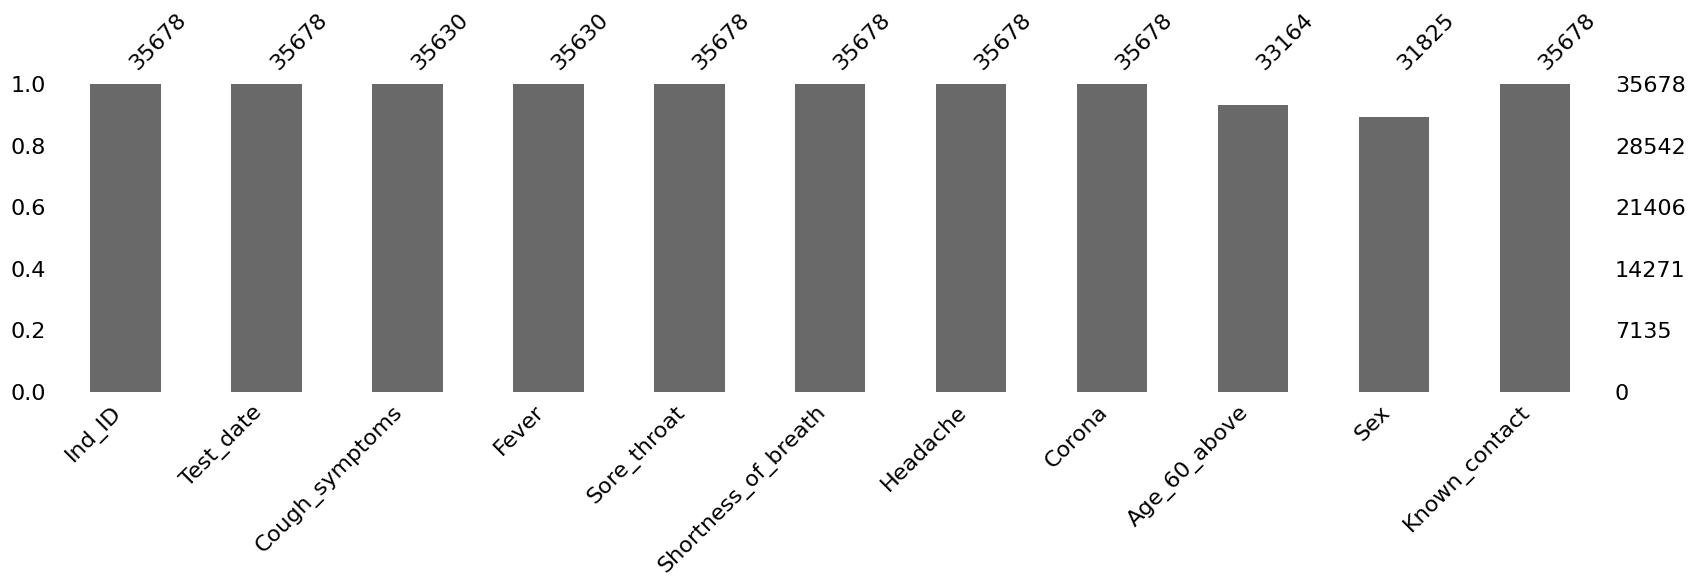

In [ ]:
# msno.bar is a simple visualization of null values by column:
msno.bar(Training_data.sample(35678), figsize=(20,4))

- As we can see from above visualization, maximum values are missing in 'Age 60 above' and 'Sex' column, So we cannot ignore these missing values.
- Few values are missing in some columns, so we can either remove them or replace by calculating mean or median.

<Axes: >

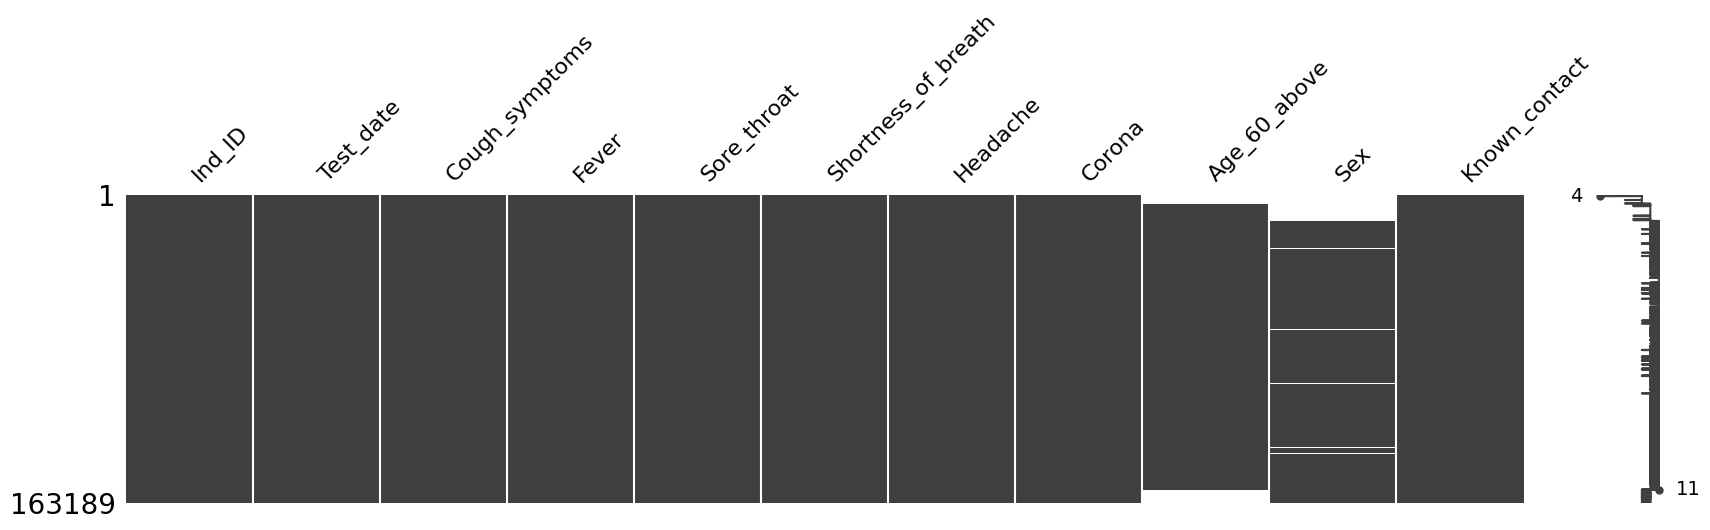

In [ ]:
# visualization of missing values
import missingno as msno
msno.matrix((Training_data),figsize=(20,4))

In [7]:
data_missing = Training_data.isnull() # checking null values again
data_missing

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,False,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,True,True,False
2,False,False,False,False,False,False,False,False,True,True,False
3,False,False,False,False,False,False,False,False,True,True,False
4,False,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...
163184,False,False,False,False,False,False,False,False,True,False,False
163185,False,False,False,False,False,False,False,False,True,False,False
163186,False,False,False,False,False,False,False,False,True,False,False
163187,False,False,False,False,False,False,False,False,True,False,False


In [8]:
# Total missing values
data_missing.sum()

Ind_ID                     0
Test_date                  0
Cough_symptoms           252
Fever                    252
Sore_throat                1
Shortness_of_breath        1
Headache                   1
Corona                     0
Age_60_above           11661
Sex                    17680
Known_contact              0
dtype: int64

In [9]:
# Percentage of missing values
data_missing.mean() * 100

Ind_ID                  0.000000
Test_date               0.000000
Cough_symptoms          0.154422
Fever                   0.154422
Sore_throat             0.000613
Shortness_of_breath     0.000613
Headache                0.000613
Corona                  0.000000
Age_60_above            7.145702
Sex                    10.834064
Known_contact           0.000000
dtype: float64

In [ ]:
Training_data['Fever'].unique()

array(['FALSE', 'TRUE', nan, False, True], dtype=object)

- We can observe here there are 'False' and 'True' are the string objects are present in the dataset and boolean values are also there along with the nan(null) values.
- We will replace this string values with boolean values.

In [10]:
# Replacing values (string to boolean):

#Training_data['Cough_symptoms'] = Training_data['Cough_symptoms'].map({True: 'TRUE', False: 'FALSE'})
Training_data['Cough_symptoms'].replace([True],'TRUE',inplace=True)
Training_data['Cough_symptoms'].replace([False],'FALSE',inplace=True)

Training_data['Fever'].replace([True],'TRUE',inplace=True)
Training_data['Fever'].replace([False],'FALSE',inplace=True)

Training_data['Sore_throat'].replace([True],'TRUE',inplace=True)
Training_data['Sore_throat'].replace([False],'FALSE',inplace=True)

Training_data['Shortness_of_breath'].replace([True],'TRUE',inplace=True)
Training_data['Shortness_of_breath'].replace([False],'FALSE',inplace=True)

Training_data['Headache'].replace([True],'TRUE',inplace=True)
Training_data['Headache'].replace([False],'FALSE',inplace=True)

Training_data['Age_60_above'].replace([True],'TRUE',inplace=True)
Training_data['Age_60_above'].replace([False],'FALSE',inplace=True)

In [ ]:
Training_data['Cough_symptoms'].unique()  # Values replaced.

array(['TRUE', 'FALSE', nan], dtype=object)

**Before dealing with missing values we have to encode all categorical data**

In [11]:
# import datetime as DT
Training_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163189 entries, 0 to 163188
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Ind_ID               163189 non-null  int64         
 1   Test_date            163189 non-null  datetime64[ns]
 2   Cough_symptoms       162937 non-null  object        
 3   Fever                162937 non-null  object        
 4   Sore_throat          163188 non-null  object        
 5   Shortness_of_breath  163188 non-null  object        
 6   Headache             163188 non-null  object        
 7   Corona               163189 non-null  object        
 8   Age_60_above         151528 non-null  object        
 9   Sex                  145509 non-null  object        
 10  Known_contact        163189 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 14.9+ MB


In [12]:
# encoding the data
Train_Data =pd.get_dummies(data=Training_data, columns=['Cough_symptoms','Fever','Sore_throat','Shortness_of_breath','Headache','Age_60_above','Sex'],
                           drop_first=True)
Train_Data.head()

,Ind_ID,Test_date,Corona,Known_contact,Cough_symptoms_TRUE,Fever_TRUE,Sore_throat_TRUE,Shortness_of_breath_TRUE,Headache_TRUE,Age_60_above_Yes,Sex_male
0,1,2020-03-11,negative,Abroad,1,0,1,0,0,0,0
1,2,2020-03-11,positive,Abroad,0,1,0,0,0,0,0
2,3,2020-03-11,positive,Abroad,0,1,0,0,0,0,0
3,4,2020-03-11,negative,Abroad,1,0,0,0,0,0,0
4,5,2020-03-11,negative,Contact with confirmed,1,0,0,0,0,0,0


In [13]:
# now we can rename these columns and remove 'TRUE' from column header.

Train_Data.rename(columns={'Cough_symptoms_TRUE':'Cough_symptoms'},inplace=True)
Train_Data.rename(columns={'Fever_TRUE':'Fever'},inplace=True)
Train_Data.rename(columns={'Sore_throat_TRUE':'Sore_throat'},inplace=True)
Train_Data.rename(columns={'Shortness_of_breath_TRUE':'Shortness_of_breath'},inplace=True)
Train_Data.rename(columns={'Headache_TRUE':'Headache'},inplace=True)
Train_Data.rename(columns={'Age_60_above_Yes':'Age_60_above'},inplace=True)
Train_Data.rename(columns={'Sex_male':'Gender'},inplace=True)

In [14]:
# Label encoding for categorical variable, These columns don't have any missing value.
from sklearn.preprocessing import LabelEncoder

for val in ['Corona','Known_contact']:
    Train_Data[val] = LabelEncoder().fit_transform(Train_Data[val])

In [15]:
Train_Impute = Train_Data.iloc[:, 2::]

In [16]:
Train_Impute.isnull().sum()

Corona                 0
Known_contact          0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Age_60_above           0
Gender                 0
dtype: int64


In [ ]:
Train_Impute['Age_60_above'].unique() # By checking unique items we can see whether the missing values are filled or not.

array([0, 1], dtype=uint8)

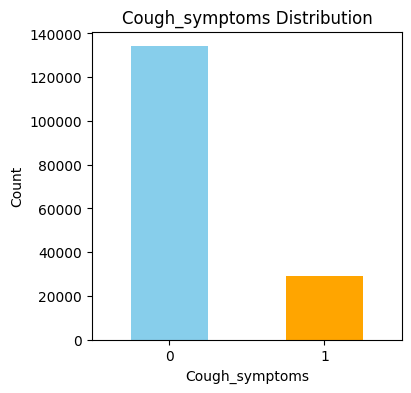

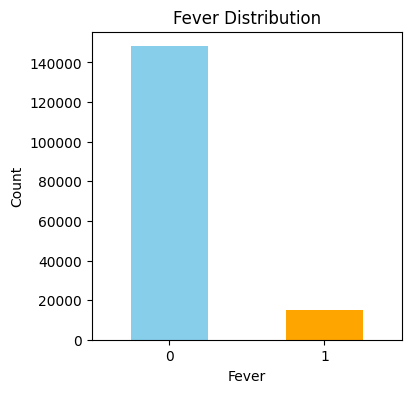

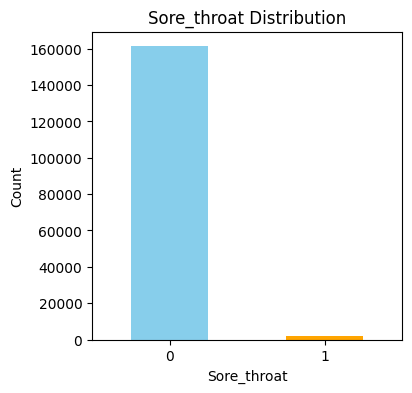

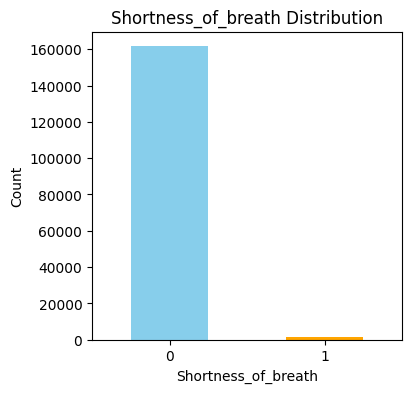

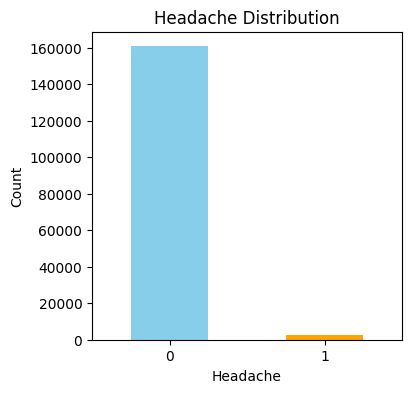

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Selecting features for creating histograms.
features = Train_Impute[['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache']]

# Creating histograms
for feature in features:
    plt.figure(figsize=(4, 4))
    Train_Impute[feature].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
    plt.title(f'{feature} Distribution')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show()

**Cough Symptoms:**
The histogram shows that the count of 0 (absence of cough symptoms) is significantly higher than 1 (presence of cough symptoms).
This could mean that most of the data points in your dataset don't exhibit cough symptoms.

**Fever:**
Similar to the cough symptoms, the count of 0 (no fever) is higher than 1 (fever).

**Sore Throat:**
The histogram again indicates that the count of 0 (no sore throat) is greater than 1 (sore throat).

**Shortness of Breath:**
Similarly, the count of 0 (no shortness of breath) is higher than 1 (shortness of breath).

**Headache:**
Finally, for the headache symptom, the count of 0 (no headache) exceeds the count of 1 (headache).

- In a medical context, this histogram suggests that a larger portion of dataset is showing the absence of symptoms (coded as 0) across the board. This could reflect that many individuals in the dataset did not exhibit these symptoms when the data was collected.

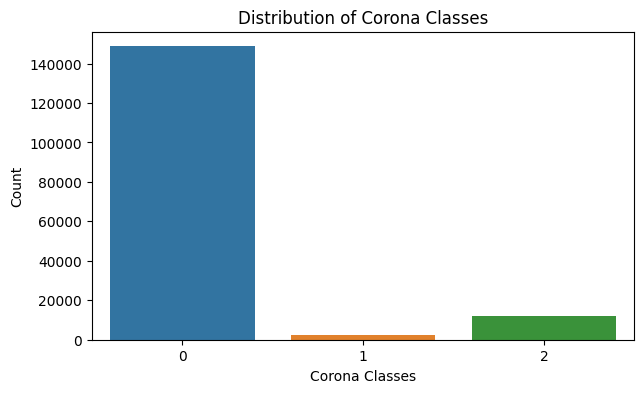

In [ ]:
# Creating Count plot for the categorical target variable 'Corona'
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 4))
sns.countplot(x='Corona', data=Train_Impute)
plt.title('Distribution of Corona Classes')
plt.xlabel('Corona Classes')
plt.ylabel('Count')
plt.show()


**Class 0:** This class likely represents individuals who tested negative for COVID-19. The high count suggests that a significant portion of the dataset consists of individuals who tested negative.

**Class 1:** This class probably represents individuals who tested positive for COVID-19. The very low count indicates that there are very few instances of positive cases in the dataset.

**Class 2:** This class could represent individuals whose COVID-19 status is neither clearly positive nor negative. The count suggests that there are some instances falling into this category.

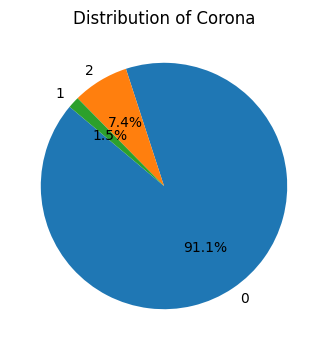

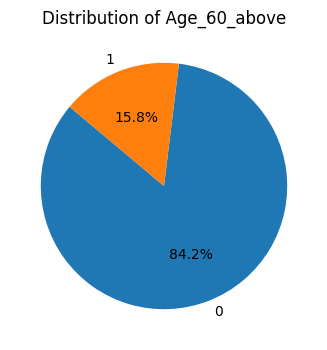

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Count the occurrences of each category
corona_counts = Train_Impute['Corona'].value_counts()
age_counts = Train_Impute['Age_60_above'].value_counts()

# Plot the pie chart for 'Corona'
plt.figure(figsize=(8, 4))
plt.pie(corona_counts, labels=corona_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Corona')
plt.show()

# Plot the pie chart for 'Age_60_above'
plt.figure(figsize=(8, 4))
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Age_60_above')
plt.show()

**Distribution of Corona:**
- **Category 0:** The 'negative' cases for the 'Corona' variable. This category occupies approximately 91.1% of the total cases in the dataset.
- **Category 1:** The 'positive' cases for the 'Corona' variable. This category occupies about 1.5% of the total cases.
- **Category 2:** The 'other' cases for the 'Corona' variable. This category occupies around 7.4% of the total cases.

**Distribution of Age 60 Above:**
The pie chart depicting the distribution of "Age 60 above" feature shows that approximately 15.8% of the cases are categorized as "1" (negative), indicating that individuals above 60 years old do not have COVID-19 symptoms. On the other hand, about 84.2% of cases are categorized as "0" (positive), suggesting that individuals above 60 years old exhibit COVID-19 symptoms.

In [17]:
# Calculating the 'spearman' correlation between binary features and the encoded target variable
spearman_corr = Train_Impute.corr(method='spearman')

print("Spearman Correlation for Binary-Categorical Associations:")
print(spearman_corr['Corona'])

Spearman Correlation for Binary-Categorical Associations:
Corona                 1.000000
Known_contact         -0.305223
Cough_symptoms         0.201306
Fever                  0.297599
Sore_throat            0.282346
Shortness_of_breath    0.235618
Headache               0.371761
Age_60_above           0.018443
Gender                 0.025681
Name: Corona, dtype: float64


Spearman correlation measures the strength and direction of the monotonic relationship between variables. In this observation:

- There is a weak negative correlation between having a known contact and the likelihood of being diagnosed with Corona.

- Weak positive correlations exist between Corona and symptoms like cough, fever, sore throat, shortness of breath and headache.

- Other attributes like age, gender, show very weak correlations with Corona.

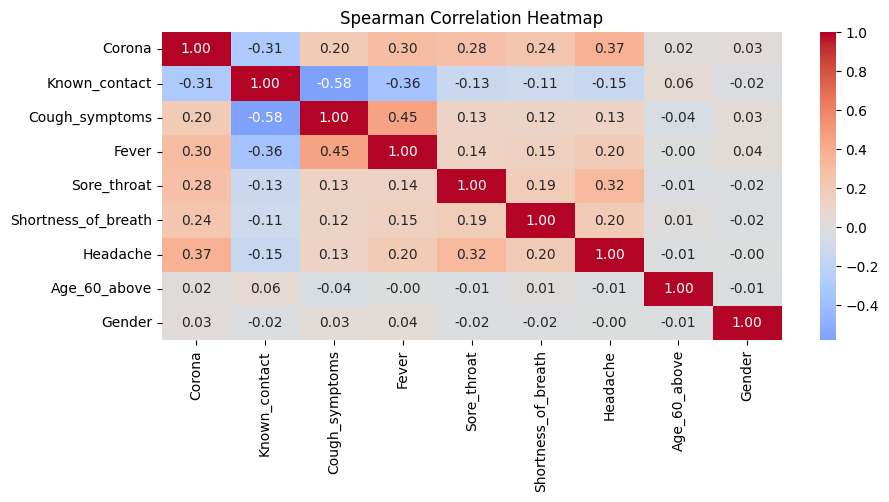

In [19]:
# Correlation matrix heatmap
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
sns.heatmap(Train_Impute.corr(method='spearman'),
            annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Spearman Correlation Heatmap')
plt.show()

In the heatmap's Spearman correlation matrix:

- A higher positive value indicates a positive correlation, where an increase in one variable is associated with an increase in another. For example, 'Fever' has a strong positive correlation (0.30) with 'Corona', suggesting that the presence of fever is often associated with a positive COVID-19 result.

- A higher negative value indicates a negative correlation, where an increase in one variable is associated with a decrease in another. For example, 'Known_contact' has a negative correlation (-0.31) with 'Corona', implying that having known contact reduces the likelihood of a positive COVID-19 result.

- The closer the correlation value is to 1 or -1, the stronger the correlation.

- 'Gender' and 'Age_60_above' have relatively weaker correlations with 'Corona', implying that they might not be as strongly indicative of COVID-19 outcomes in this dataset.

In [20]:
# Separating features (X) and target variable (y)
X_train = Train_Impute.drop('Corona', axis=1)
y_train = Train_Impute['Corona']

## Feature Selection by using SelectKBest:

I have utilized the SelectKBest feature selection technique, which uses statistical methods to identify the most influential features. This ensures that our model is trained on the most relevant variables, thus improving accuracy.

In [21]:
# applying SelectKBest class to extract best features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X_train, y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)

#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns
print(featureScores.nlargest(8,'Score'))  #print 8 best features

              Features         Score
5             Headache  25764.980613
2                Fever  15069.233639
3          Sore_throat  14739.090055
4  Shortness_of_breath  10278.458951
1       Cough_symptoms   6435.568676
0        Known_contact   1992.673307
7               Gender    113.945289
6         Age_60_above     51.544853


- Headache' has the highest score, indicating it's highly relevant for the task.
- 'Fever', 'Sore_throat', and 'Shortness_of_breath' also have high scores, suggesting their importance.
- 'Cough_symptoms' and 'Known_contact' have moderate scores, indicating their contribution.
- 'Gender' and 'Age_60_above' have relatively low scores, suggesting lower importance for the task.

## Model Selection:
Several machine learning algorithms were evaluated, including K-Nearest Neighbors, Support Vector Machine, Naive Bayes, and Logistic Regression. These algorithms are known for their suitability in classification tasks. We assessed their performance using accuracy metrics, confusion matrices, and classification reports.

**1. Logistic Regression:**

In [22]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Separating features (X) and target variable (y)
X_train = Train_Impute.drop('Corona', axis=1)
y_train = Train_Impute['Corona']

# Feature Selection using SelectKBest with chi-square scoring function
k_best_selector = SelectKBest(score_func=chi2, k=5)  # Select top 5 features
X_train_selected = k_best_selector.fit_transform(X_train, y_train)

# Creating the Logistic Regression classifier
logreg_classifier = LogisticRegression(max_iter=1000, random_state=42)

# Fitting the Logistic Regression model on the Train dataset
logreg_classifier.fit(X_train_selected, y_train)

# Making predictions on the Train dataset
y_train_pred = logreg_classifier.predict(X_train_selected)

# Evaluating the model on the Train dataset
train_classification_report_str = classification_report(y_train, y_train_pred, zero_division=1)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_confusion_mat = confusion_matrix(y_train, y_train_pred)

print("Selected Features for Training Dataset:")
print(X_train.columns[k_best_selector.get_support()])
print("Train Accuracy - Logistic Regression: {:.2f}%".format(train_accuracy * 100))
print("Train Classification Report - Logistic Regression:")
print(train_classification_report_str)
print("Train Confusion Matrix - Logistic Regression:")
print(train_confusion_mat)

Selected Features for Training Dataset:
Index(['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath',
       'Headache'],
      dtype='object')
Train Accuracy - Logistic Regression: 92.85%
Train Classification Report - Logistic Regression:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96    148686
           1       1.00      0.00      0.00      2472
           2       0.86      0.27      0.42     12031

    accuracy                           0.93    163189
   macro avg       0.93      0.42      0.46    163189
weighted avg       0.93      0.93      0.91    163189

Train Confusion Matrix - Logistic Regression:
[[148229      0    457]
 [  2413      0     59]
 [  8745      0   3286]]


**2. NAIVE_BAYES:**

In [23]:
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Separate features (X_train) and target variable (y_train)
X_train = Train_Impute.drop('Corona', axis=1)
y_train = Train_Impute['Corona']

# Performing feature selection using SelectKBest with f_classif scoring function
# Selecting top 5 features based on F-value ranking
selector = SelectKBest(score_func=f_classif, k=5)
X_train_selected = selector.fit_transform(X_train, y_train)

# Geting the selected feature indices
selected_feature_indices = selector.get_support(indices=True)

# Geting the names of the selected features
selected_features = X_train.columns[selected_feature_indices]

# Creating and train the Naive Bayes classifier (MultinomialNB)
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_selected, y_train)

# Making predictions on the Train dataset
y_train_pred = nb_classifier.predict(X_train_selected)

# Evaluating the model on the Train dataset
train_classification_report_str = classification_report(y_train, y_train_pred, zero_division=1)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_confusion_mat = confusion_matrix(y_train, y_train_pred)

print("Selected Features:")
print(selected_features)
print("Train Accuracy : {:.2f}%".format(train_accuracy * 100))
print("Train Classification Report:")
print(train_classification_report_str)
print("Train Confusion Matrix:")
print(train_confusion_mat)

Selected Features:
Index(['Known_contact', 'Fever', 'Sore_throat', 'Shortness_of_breath',
       'Headache'],
      dtype='object')
Train Accuracy : 92.98%
Train Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96    148686
           1       1.00      0.00      0.00      2472
           2       0.83      0.31      0.45     12031

    accuracy                           0.93    163189
   macro avg       0.92      0.44      0.47    163189
weighted avg       0.93      0.93      0.91    163189

Train Confusion Matrix:
[[147960      0    726]
 [  2404      0     68]
 [  8258      0   3773]]


**3. Support Vector Machine (SVM):**

In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Separating features (X_train) and target variable (y_train)
X_train = Train_Impute.drop('Corona', axis=1)
y_train = Train_Impute['Corona']

# Feature Selection using SelectKBest with chi-square scoring function
k_best_selector = SelectKBest(score_func=chi2, k=5)  # Select 5 features
X_train_selected = k_best_selector.fit_transform(X_train, y_train)

# Model Training
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_selected, y_train)

# Make predictions on the Train dataset
y_train_pred = svm_model.predict(X_train_selected)

# Evaluate the model on the Train dataset
train_classification_report_str = classification_report(y_train, y_train_pred, zero_division=1)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_confusion_mat = confusion_matrix(y_train, y_train_pred)

print("Selected Features for Training Dataset:")
print(X_train.columns[k_best_selector.get_support()])
print("Train Accuracy - SVM: {:.2f}%".format(train_accuracy * 100))
print("Train Classification Report - SVM:")
print(train_classification_report_str)
print("Train Confusion Matrix - SVM:")
print(train_confusion_mat)

Selected Features for Training Dataset:
Index(['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath',
       'Headache'],
      dtype='object')
Train Accuracy - SVM: 92.98%
Train Classification Report - SVM:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96    148686
           1       1.00      0.00      0.00      2472
           2       0.83      0.31      0.45     12031

    accuracy                           0.93    163189
   macro avg       0.92      0.44      0.47    163189
weighted avg       0.93      0.93      0.91    163189

Train Confusion Matrix - SVM:
[[147960      0    726]
 [  2404      0     68]
 [  8258      0   3773]]


**4. Decision Tree:**

In [24]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train = Train_Impute.drop('Corona', axis=1)
y_train = Train_Impute['Corona']

# Feature Selection using SelectKBest with chi-square scoring function
k_best_selector = SelectKBest(score_func=chi2, k=5)  # Select 5 features
X_train_selected = k_best_selector.fit_transform(X_train, y_train)

# Creating and train the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_selected, y_train)

# Making predictions on the Train dataset
y_train_pred = dt_classifier.predict(X_train_selected)

# Evaluating the model on the Train dataset
train_classification_report_str = classification_report(y_train, y_train_pred, zero_division=1)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_confusion_mat = confusion_matrix(y_train, y_train_pred)

print("Selected Features for Training Dataset:")
print(X_train.columns[k_best_selector.get_support()])
print("Train Accuracy - Decision Tree: {:.2f}%".format(train_accuracy * 100))
print("Train Classification Report - Decision Tree:")
print(train_classification_report_str)
print("Train Confusion Matrix - Decision Tree:")
print(train_confusion_mat)

Selected Features for Training Dataset:
Index(['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath',
       'Headache'],
      dtype='object')
Train Accuracy - Decision Tree: 92.98%
Train Classification Report - Decision Tree:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96    148686
           1       1.00      0.00      0.00      2472
           2       0.83      0.31      0.45     12031

    accuracy                           0.93    163189
   macro avg       0.92      0.44      0.47    163189
weighted avg       0.93      0.93      0.91    163189

Train Confusion Matrix - Decision Tree:
[[147960      0    726]
 [  2404      0     68]
 [  8258      0   3773]]


# Test Dataset:

- Now we will perform all the Data Analysis and Machine Learning approach on Test Dataset to see the result whether our ML modle performing well or not on Test Dataset.

In [39]:
# Defining the date range.
start_date = pd.to_datetime("16-04-2020", format='%d-%m-%Y')
end_date = pd.to_datetime("30-04-2020", format='%d-%m-%Y')

# Filtering the data based on the date range.
New_data = dataF[(dataF['Test_date'] >= start_date) & (dataF['Test_date'] <= end_date)]


In [ ]:
New_data.head()  # observing first 5 rows

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
163189,163190,2020-04-16,True,False,False,False,False,negative,None,female,Abroad
163190,163191,2020-04-16,False,False,False,False,False,negative,None,female,Other
163191,163192,2020-04-16,True,False,False,False,False,negative,None,female,Abroad
163192,163193,2020-04-16,False,False,False,False,False,negative,None,male,Other
163193,163194,2020-04-16,False,False,False,False,False,negative,None,male,Other


In [ ]:
New_data.tail()  # observing last 5 rows

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
278843,278844,30-04-2020,False,False,False,False,False,positive,None,male,Other
278844,278845,30-04-2020,False,False,False,False,False,negative,None,female,Other
278845,278846,30-04-2020,False,False,False,False,False,negative,None,male,Other
278846,278847,30-04-2020,False,False,False,False,False,negative,None,male,Other
278847,278848,30-04-2020,False,False,False,False,False,negative,None,female,Other


In [ ]:
New_data.shape

(115659, 11)

In [40]:
# We will make a copy of the dataset.
Test_data = New_data.copy()

 **Replacaing 'None' with Missing Value 'Null'/'NaN'.**

In [41]:
Test_data.replace('None', np.nan, inplace=True)

Test_data

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
163189,163190,2020-04-16,True,False,False,False,False,negative,NaN,female,Abroad
163190,163191,2020-04-16,False,False,False,False,False,negative,NaN,female,Other
163191,163192,2020-04-16,True,False,False,False,False,negative,NaN,female,Abroad
163192,163193,2020-04-16,False,False,False,False,False,negative,NaN,male,Other
163193,163194,2020-04-16,False,False,False,False,False,negative,NaN,male,Other
...,...,...,...,...,...,...,...,...,...,...,...
278843,278844,2020-04-30,False,False,False,False,False,positive,NaN,male,Other
278844,278845,2020-04-30,False,False,False,False,False,negative,NaN,female,Other
278845,278846,2020-04-30,False,False,False,False,False,negative,NaN,male,Other
278846,278847,2020-04-30,False,False,False,False,False,negative,NaN,male,Other


In [28]:
Test_data.isnull().sum()  # checking missing values.

Ind_ID                      0
Test_date                   0
Cough_symptoms              0
Fever                       0
Sore_throat                 0
Shortness_of_breath         0
Headache                    0
Corona                      0
Age_60_above           115659
Sex                      1883
Known_contact               0
dtype: int64

In [ ]:
Test_data['Age_60_above'].unique()

array([nan])

- Herer the column 'Age_60_above' is completely empty, in such scenario it is not possible to apply encoding mehtod on this column. So we can ignore these values or replace it by 'NA' as we don't know the details for the provided data. It is showing details for this column were not collected or recorded during data collection for the test period. This is a common scenario in real-world datasets, where data collection practices might vary, leading to missing or incomplete information for certain features.
- We can ignore/exclude this column or we can fill the column by 'NA'(Not Available).

In [ ]:
# To describe numeric and categorical columns

Test_data.describe(include='all')

<ipython-input-38-ac57f1f65d33>:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  Test_data.describe(include='all')


,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
count,115659.000000,115659,115659,115659,115659,115659,115659,115659,115659,113776,115659
unique,NaN,15,2,2,2,2,2,3,1,2,3
top,NaN,2020-04-20 00:00:00,False,False,False,False,False,negative,NA,female,Other
freq,NaN,10921,102542,108968,115636,115641,115633,111541,115659,58226,105570
first,NaN,2020-04-16 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2020-04-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,221019.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,33388.021729,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,163190.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,192104.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Dealing with missing values

<Axes: >

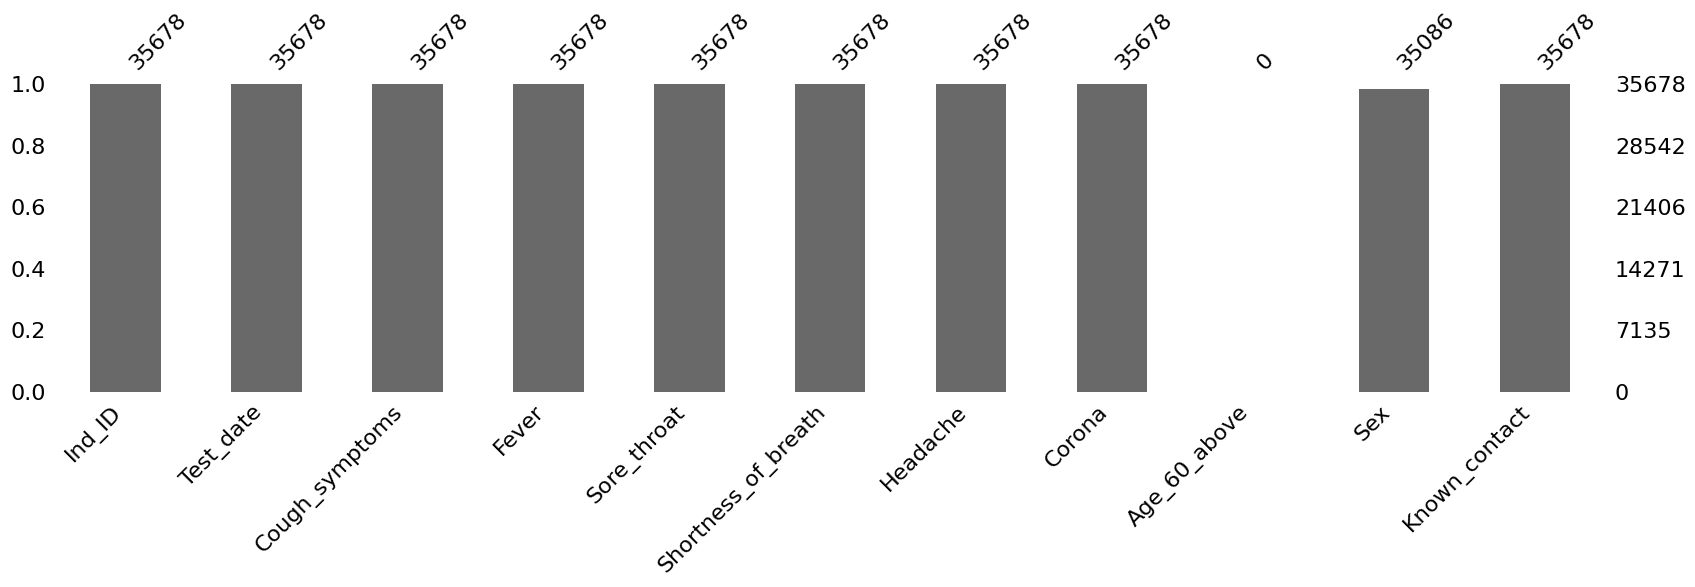

In [29]:
# msno.bar is a simple visualization of null values by column:
msno.bar(Test_data.sample(35678), figsize=(20,4))

- In Test dataset 'Age_60_above' column is empty.

<Axes: >

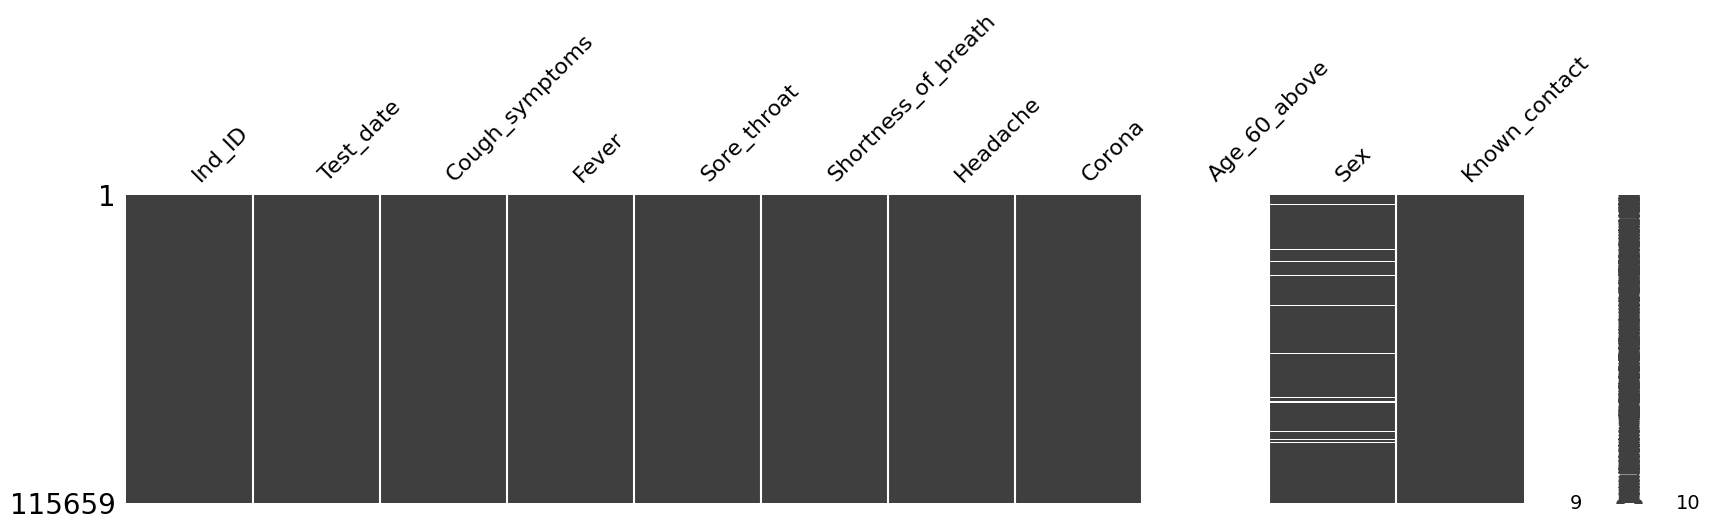

In [ ]:
# visualization of missing values
import missingno as msno
msno.matrix((Test_data),figsize=(20,4))

In [30]:
Test_data_missing = Test_data.isnull() # checking null values again
Test_data_missing

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
163189,False,False,False,False,False,False,False,False,True,False,False
163190,False,False,False,False,False,False,False,False,True,False,False
163191,False,False,False,False,False,False,False,False,True,False,False
163192,False,False,False,False,False,False,False,False,True,False,False
163193,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
278843,False,False,False,False,False,False,False,False,True,False,False
278844,False,False,False,False,False,False,False,False,True,False,False
278845,False,False,False,False,False,False,False,False,True,False,False
278846,False,False,False,False,False,False,False,False,True,False,False


In [31]:
# Total missing values
Test_data_missing.sum()

Ind_ID                      0
Test_date                   0
Cough_symptoms              0
Fever                       0
Sore_throat                 0
Shortness_of_breath         0
Headache                    0
Corona                      0
Age_60_above           115659
Sex                      1883
Known_contact               0
dtype: int64

In [ ]:
# Percentage of missing values
Test_data_missing.mean() * 100

Ind_ID                 0.000000
Test_date              0.000000
Cough_symptoms         0.000000
Fever                  0.000000
Sore_throat            0.000000
Shortness_of_breath    0.000000
Headache               0.000000
Corona                 0.000000
Age_60_above           0.000000
Sex                    1.628062
Known_contact          0.000000
dtype: float64

In [ ]:
Test_data['Sore_throat'].unique()

array(['FALSE', 'TRUE', False, True], dtype=object)

In [42]:
# Replacing values (string to boolean):

#Training_data['Cough_symptoms'] = Training_data['Cough_symptoms'].map({True: 'TRUE', False: 'FALSE'})
Test_data['Cough_symptoms'].replace([True],'TRUE',inplace=True)
Test_data['Cough_symptoms'].replace([False],'FALSE',inplace=True)

Test_data['Fever'].replace([True],'TRUE',inplace=True)
Test_data['Fever'].replace([False],'FALSE',inplace=True)

Test_data['Sore_throat'].replace([True],'TRUE',inplace=True)
Test_data['Sore_throat'].replace([False],'FALSE',inplace=True)

Test_data['Shortness_of_breath'].replace([True],'TRUE',inplace=True)
Test_data['Shortness_of_breath'].replace([False],'FALSE',inplace=True)

Test_data['Headache'].replace([True],'TRUE',inplace=True)
Test_data['Headache'].replace([False],'FALSE',inplace=True)


In [ ]:
Test_data['Cough_symptoms'].unique() # values replaced.

array(['TRUE', 'FALSE'], dtype=object)

**Before dealing with missing values we have to encode all categorical data**

In [33]:
Test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115659 entries, 163189 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Ind_ID               115659 non-null  int64         
 1   Test_date            115659 non-null  datetime64[ns]
 2   Cough_symptoms       115659 non-null  object        
 3   Fever                115659 non-null  object        
 4   Sore_throat          115659 non-null  object        
 5   Shortness_of_breath  115659 non-null  object        
 6   Headache             115659 non-null  object        
 7   Corona               115659 non-null  object        
 8   Age_60_above         0 non-null       float64       
 9   Sex                  113776 non-null  object        
 10  Known_contact        115659 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(8)
memory usage: 10.6+ MB


In [43]:
# encoding the data
Test_Data =pd.get_dummies(data=Test_data, columns=['Cough_symptoms','Fever','Sore_throat','Shortness_of_breath','Headache','Age_60_above','Sex'],
                           drop_first=True)
Test_Data.head()

,Ind_ID,Test_date,Corona,Known_contact,Cough_symptoms_TRUE,Fever_TRUE,Sore_throat_TRUE,Shortness_of_breath_TRUE,Headache_TRUE,Sex_male
163189,163190,2020-04-16,negative,Abroad,1,0,0,0,0,0
163190,163191,2020-04-16,negative,Other,0,0,0,0,0,0
163191,163192,2020-04-16,negative,Abroad,1,0,0,0,0,0
163192,163193,2020-04-16,negative,Other,0,0,0,0,0,1
163193,163194,2020-04-16,negative,Other,0,0,0,0,0,1


In [44]:
# now we can rename these columns and remove 'TRUE' from column name.

Test_Data.rename(columns={'Cough_symptoms_TRUE':'Cough_symptoms'},inplace=True)
Test_Data.rename(columns={'Fever_TRUE':'Fever'},inplace=True)
Test_Data.rename(columns={'Sore_throat_TRUE':'Sore_throat'},inplace=True)
Test_Data.rename(columns={'Shortness_of_breath_TRUE':'Shortness_of_breath'},inplace=True)
Test_Data.rename(columns={'Headache_TRUE':'Headache'},inplace=True)
Test_Data.rename(columns={'Age_60_above_Yes':'Age_60_above'},inplace=True)
Test_Data.rename(columns={'Sex_male':'Gender'},inplace=True)

In [45]:
# Label encoding for categorical variable, These columns don't have any missing value.
from sklearn.preprocessing import LabelEncoder

for val in ['Corona','Known_contact']:
    Test_Data[val] = LabelEncoder().fit_transform(Test_Data[val])

In [46]:
# # Removing teh first 2 columns from the dataset (ID & Date)
Test_Impute = Test_Data.iloc[:, 2::]

In [47]:
Test_Impute.isnull().sum()

Corona                 0
Known_contact          0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Gender                 0
dtype: int64


In [48]:
# Calculating the 'spearman' correlation between binary features and the encoded target variable
spearman_corr = Test_Impute.corr(method='spearman')

print("Spearman Correlation for Binary-Categorical Associations:")
print(spearman_corr['Corona'])

Spearman Correlation for Binary-Categorical Associations:
Corona                 1.000000
Known_contact         -0.219139
Cough_symptoms         0.098316
Fever                  0.083698
Sore_throat            0.007338
Shortness_of_breath    0.012746
Headache               0.031660
Gender                 0.017278
Name: Corona, dtype: float64


- Higher positive values closer to 1 for a feature and 'Corona' indicate a stronger positive relationship between that feature and the 'Corona' variable.
- Lower negative values closer to -1 for a feature and 'Corona' indicate a stronger negative relationship between that feature and the 'Corona' variable.
- Values closer to 0 indicate a weaker correlation or no significant correlation between the feature and 'Corona'.
- For example, 'Known_contact' has a moderate negative correlation with 'Corona', while 'Cough_symptoms' has a weak positive correlation. 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache', and 'Gender' have very weak correlations with 'Corona'.

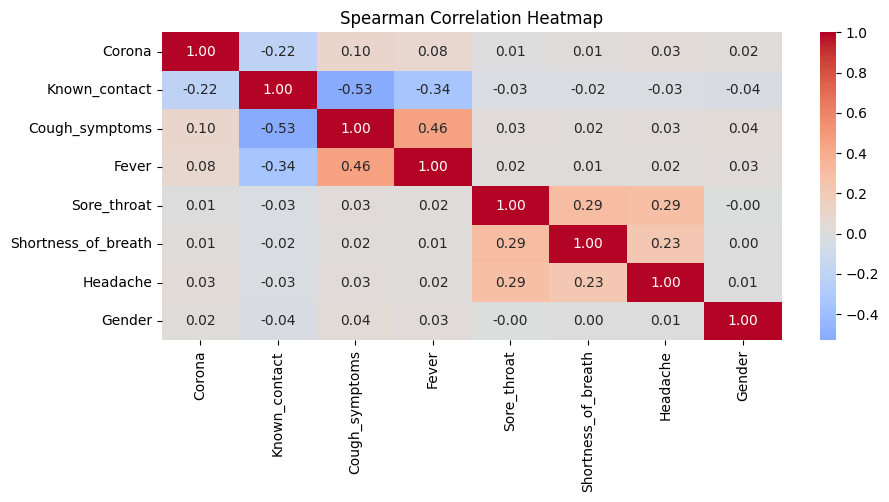

In [49]:
# Correlation matrix heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(Test_Impute.corr(method='spearman'),
            annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Spearman Correlation Heatmap')
plt.show()


Based on the Spearman correlation values between the binary features and the target variable 'Corona', here are the observations:

- 'Known_contact' has a negative correlation (-0.22) with the 'Corona' variable, suggesting that individuals with known contacts are less likely to test positive for COVID-19.
- 'Cough_symptoms' has a positive correlation (0.10) with 'Corona', indicating that individuals with cough symptoms are slightly more likely to test positive.
- 'Fever' and 'Sore_throat' have relatively low positive correlations (0.08 and 0.01, respectively) with 'Corona', implying a mild association with COVID-19.
- 'Shortness_of_breath' and 'Headache' also have low positive correlations (0.01 and 0.03) with 'Corona', suggesting a weaker link.
- 'Gender' has a slightly negative correlation (-0.02) with 'Corona', implying a minor trend.
These correlation values indicate the strength and direction of the relationships between the features and the likelihood of testing positive for COVID-19.

**1. Logistic Regression on Test Dataset:**

In [50]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_test_log = Test_Impute.drop('Corona', axis=1)
y_test_log = Test_Impute['Corona']

# Feature Selection using SelectKBest with chi-square scoring function
k_best_selector = SelectKBest(score_func=chi2, k=5)  # Select top 5 features

# Fiting SelectKBest to the training data
X_train_selected = k_best_selector.fit_transform(X_train, y_train)

# Geting the selected feature indices
selected_feature_indices_train = k_best_selector.get_support(indices=True)

# Geting the names of the selected features for training dataset
selected_features_train = X_train.columns[selected_feature_indices_train]

# Feature Selection on Test Data
X_test_selected = X_test_log.iloc[:, selected_feature_indices_train]

# Train Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000)  # we can adjust hyperparameters as needed
logreg_model.fit(X_train_selected, y_train)

# Making predictions on the Test dataset
y_test_pred_logreg = logreg_model.predict(X_test_selected)

# Evaluating the model on the Test dataset
test_accuracy_logreg = accuracy_score(y_test_log, y_test_pred_logreg)
test_classification_report_logreg = classification_report(y_test_log, y_test_pred_logreg, zero_division=1)
test_confusion_mat_logreg = confusion_matrix(y_test_log, y_test_pred_logreg)

print("Selected Features for Training Dataset:")
print(selected_features_train)

print("\nTest Accuracy - Logistic Regression: {:.2f}%".format(test_accuracy_logreg * 100))
print("Test Classification Report - Logistic Regression:")
print(test_classification_report_logreg)
print("Test Confusion Matrix - Logistic Regression:")
print(test_confusion_mat_logreg)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Selected Features for Training Dataset:
Index(['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath',
       'Headache'],
      dtype='object')

Test Accuracy - Logistic Regression: 96.42%
Test Classification Report - Logistic Regression:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    111541
           1       1.00      0.00      0.00      1420
           2       0.26      0.00      0.01      2698

    accuracy                           0.96    115659
   macro avg       0.74      0.33      0.33    115659
weighted avg       0.95      0.96      0.95    115659

Test Confusion Matrix - Logistic Regression:
[[111510      0     31]
 [  1419      0      1]
 [  2687      0     11]]


**2. Naive Bayes:**

In [51]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_test = Test_Impute.drop('Corona', axis=1)
y_test = Test_Impute['Corona']

# Feature Selection using SelectKBest with chi-square scoring function
k_best_selector = SelectKBest(score_func=chi2, k=5)  # Select 5 features
X_test_selected = k_best_selector.fit_transform(X_test, y_test)

# Making predictions on the Test dataset
y_test_pred = nb_classifier.predict(X_test_selected)

# Evaluating the model on the Test dataset
test_classification_report_str = classification_report(y_test, y_test_pred, zero_division=1)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_confusion_mat = confusion_matrix(y_test, y_test_pred)

print("Selected Features for Test Dataset:")
print(X_test.columns[k_best_selector.get_support()])
print("Test Accuracy - Naive Bayes: {:.2f}%".format(test_accuracy * 100))
print("Test Classification Report - Naive Bayes:")
print(test_classification_report_str)
print("Test Confusion Matrix - Naive Bayes:")
print(test_confusion_mat)

Selected Features for Test Dataset:
Index(['Known_contact', 'Cough_symptoms', 'Fever', 'Shortness_of_breath',
       'Headache'],
      dtype='object')
Test Accuracy - Naive Bayes: 91.66%
Test Classification Report - Naive Bayes:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96    111541
           1       1.00      0.00      0.00      1420
           2       0.08      0.19      0.11      2698

    accuracy                           0.92    115659
   macro avg       0.68      0.38      0.36    115659
weighted avg       0.95      0.92      0.93    115659

Test Confusion Matrix - Naive Bayes:
[[105489      0   6052]
 [  1280      0    140]
 [  2175      0    523]]


**3.Support Vector Machine (SVM) on Test Dataset:**

In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_test_svm = Test_Impute.drop('Corona', axis=1)
y_test_svm = Test_Impute['Corona']

# Feature Selection using SelectKBest with chi-square scoring function
k_best_selector = SelectKBest(score_func=chi2, k=5)  # Select 5 features
X_test_selected = k_best_selector.fit_transform(X_test_svm, y_test_svm)

# Making predictions on the Test dataset
y_test_pred = svm_model.predict(X_test_selected)

# Evaluating the model on the Test dataset
test_classification_report_str = classification_report(y_test_svm, y_test_pred, zero_division=1)
test_accuracy = accuracy_score(y_test_svm, y_test_pred)
test_confusion_mat = confusion_matrix(y_test_svm, y_test_pred)

print("Selected Features for Test Dataset:")
print(X_test_svm.columns[k_best_selector.get_support()])
print("Test Accuracy - SVM: {:.2f}%".format(test_accuracy * 100))
print("Test Classification Report - SVM:")
print(test_classification_report_str)
print("Test Confusion Matrix - SVM:")
print(test_confusion_mat)

Selected Features for Test Dataset:
Index(['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath',
       'Headache'],
      dtype='object')
Test Accuracy - SVM: 94.90%
Test Classification Report - SVM:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97    161766
           1       1.00      0.00      0.00      2304
           2       0.92      0.15      0.26      7513

    accuracy                           0.95    171583
   macro avg       0.96      0.38      0.41    171583
weighted avg       0.95      0.95      0.93    171583

Test Confusion Matrix - SVM:
[[161687      0     79]
 [  2284      0     20]
 [  6373      0   1140]]


**4. Decision Tree on Test Dataset:**

In [52]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


X_test = Test_Impute.drop('Corona', axis=1)
y_test = Test_Impute['Corona']

# Feature Selection using SelectKBest with chi-square scoring function
k_best_selector = SelectKBest(score_func=chi2, k=5)  # Select 5 features
X_test_selected = k_best_selector.fit_transform(X_test, y_test)

# Creating the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_test_selected, y_test)

# Making predictions on the Test dataset
y_test_pred = dt_classifier.predict(X_test_selected)

# Evaluating the model on the Test dataset
test_classification_report_str = classification_report(y_test, y_test_pred, zero_division=1)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_confusion_mat = confusion_matrix(y_test, y_test_pred)

print("Selected Features for Test Dataset:")
print(X_test.columns[k_best_selector.get_support()])
print("Test Accuracy - Decision Tree: {:.2f}%".format(test_accuracy * 100))
print("Test Classification Report - Decision Tree:")
print(test_classification_report_str)
print("Test Confusion Matrix - Decision Tree:")
print(test_confusion_mat)

Selected Features for Test Dataset:
Index(['Known_contact', 'Cough_symptoms', 'Fever', 'Shortness_of_breath',
       'Headache'],
      dtype='object')
Test Accuracy - Decision Tree: 97.34%
Test Classification Report - Decision Tree:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    111541
           1       1.00      0.00      0.00      1420
           2       0.75      0.56      0.64      2698

    accuracy                           0.97    115659
   macro avg       0.91      0.52      0.54    115659
weighted avg       0.97      0.97      0.97    115659

Test Confusion Matrix - Decision Tree:
[[111075      0    466]
 [  1396      0     24]
 [  1191      0   1507]]


In [ ]:
# Merge the two datasets
merged_data = pd.concat([Train_Impute, Test_Impute], ignore_index=True)

In [ ]:
merged_data.to_csv("Covid19_data.csv")

| Classification Approach         | Accuracy_Train |         Accuracy_Test |
| --- | --- | --- |
|1 - Logistic Regression | 92.85% | 96.42% |
|2 - Naive Bayes | 92.98% | 91.66% |
|3 - SVM | 92.98% | 94.90% |
|4 - Decision Tree | 92.98% | 97.34% |




### **Conclusion:**

Our project showcases the power of machine learning in predicting COVID-19 cases with high accuracy. This has significant implications for early diagnosis and timely intervention, potentially contributing to improved public health responses. As we move forward, continuous refinement of the models and incorporation of new data will be crucial in enhancing their predictive capabilities.

Our analysis reveals that different algorithms perform remarkably well in predicting COVID-19 status. The accuracy achieved during model training and testing indicates that our models are effective in capturing the underlying patterns in the data.

Specifically:

**Logistic Regression:** With an accuracy of 92.85% during training and 96.42% during testing, this model demonstrates a strong ability to predict COVID-19 cases accurately.

**Naive Bayes:** This model achieved an accuracy of 92.98% during training and 91.66% during testing, showcasing its effectiveness in handling this particular dataset.

**Support Vector Machine (SVM):** Our SVM model recorded an accuracy of 92.98% during training and 94.90% during testing, further reinforcing its capability in predicting COVID-19 cases.

**Decision Tree:** With an impressive accuracy of 92.98% during training and 97.34% during testing, the decision tree algorithm shines as one of the top performers in this project.

These results collectively demonstrate the potential of machine learning in accurately predicting COVID-19 cases. The consistently high accuracy across various algorithms suggests the robustness of our models.